**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
from sklearn.datasets import load_breast_cancer

frame = load_breast_cancer(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Sklearn Multilayer Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
hidden_layer_sizes = (100, 200,)

### Parameters

hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
Activation function for the hidden layer.
* 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
* 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
* 'relu', the rectified linear unit function, returns f(x) = max(0, x)

solver {'lbfgs', 'sgd', 'adam'}, default='adam'
The solver for weight optimization.
* 'lbfgs' is an optimizer in the family of quasi-Newton methods.
* 'sgd' refers to stochastic gradient descent.
* 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
The default solver 'adam' works pretty well on relatively large datasets (>= 1000 training samples) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

alpha float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size int, default='auto'
Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate {'constant', 'invscaling', 'adaptive'}, default='constant'
Learning rate schedule for weight updates.
*'constant' is a constant learning rate given by 'learning_rate_init'.
*'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of *'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)
*'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
Only used when solver='sgd'.

learning_rate_init double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

power_t double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to 'invscaling'. Only used when solver='sgd'.

max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle bool, default=True
Whether to shuffle samples in each iteration. Only used when solver='sgd' or 'adam'.

random_state int, RandomState instance or None, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

tol float, default=1e-4
Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

verbose bool, default=False
Whether to print progress messages to stdout.

warm_start bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

momentum float, default=0.9
Momentum for gradient descent update. Should be between 0 and 1. Only used when solver='sgd'.

early_stopping bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. Only effective when solver='sgd' or 'adam'

validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

beta_1 float, default=0.9
Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1). Only used when solver='adam'

beta_2 float, default=0.999
Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). Only used when solver='adam'

epsilon float, default=1e-8
Value for numerical stability in adam. Only used when solver='adam'

n_iter_no_change int, default=10
Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'


### Attributes
loss_ float
The current loss computed with the loss function.

coefs_ list, length n_layers - 1
The ith element in the list represents the weight matrix corresponding to layer i.

intercepts_ list, length n_layers - 1
The ith element in the list represents the bias vector corresponding to layer i + 1.

n_iter_ int,
The number of iterations the solver has ran.

n_layers_ int
Number of layers.

n_outputs_ int
Number of outputs.

out_activation_ string
Name of the output activation function.

In [9]:
clf = MLPClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9883040935672515
F1-score [0.984375   0.99065421]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


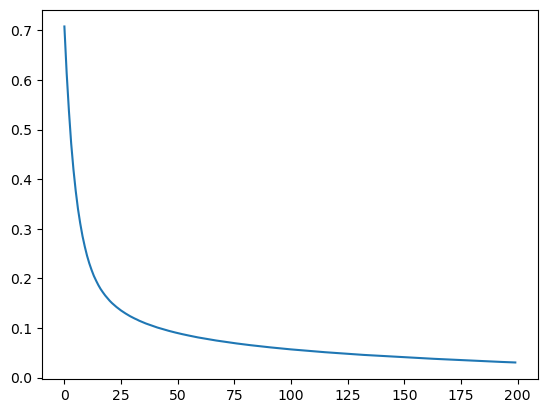

In [10]:
plt.plot(clf.loss_curve_)
plt.show()

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, 
                    learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, 
                    momentum=0.9, random_state=0, max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9707602339181286
F1-score [0.96062992 0.97674419]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



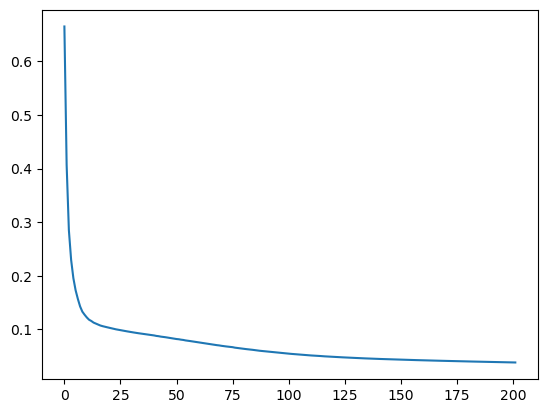

In [12]:
plt.plot(clf.loss_curve_)
plt.show()

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9707602339181286
F1-score [0.96062992 0.97674419]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



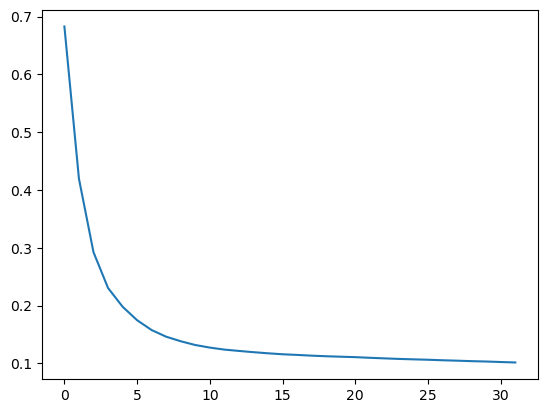

In [14]:
plt.plot(clf.loss_curve_)
plt.show()

# Keras Deep Neural Networks

In [ ]:
# !pip install scikeras

In [15]:
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

In [16]:
n_classes = 2
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer="adam", metrics=['accuracy'])
    return model

In [17]:
model1 = build_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,354
Trainable params: 12,354
Non-trainable params: 0
_________________________________________________________________


2023-03-27 18:31:41.150987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
history1 = model1.fit(X_train, y_train, epochs=200, batch_size=32).history

Epoch 1/200
13/13 [==============================] - 0s 962us/step - loss: 0.4695 - accuracy: 0.7990
Epoch 2/200
13/13 [==============================] - 0s 965us/step - loss: 0.1544 - accuracy: 0.9523
Epoch 3/200
13/13 [==============================] - 0s 936us/step - loss: 0.1049 - accuracy: 0.9724
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9824
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9874
Epoch 6/200
13/13 [==============================] - 0s 946us/step - loss: 0.0590 - accuracy: 0.9899
Epoch 7/200
13/13 [==============================] - 0s 988us/step - loss: 0.0533 - accuracy: 0.9899
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9925
Epoch 9/200
13/13 [==============================] - 0s 964us/step - loss: 0.0410 - accuracy: 0.9925
Epoch 10/200
13/13 [==============================] - 0s 995us/step - loss: 0.0370 - accuracy: 0.

13/13 [==============================] - 0s 857us/step - loss: 2.8930e-04 - accuracy: 1.0000
Epoch 81/200
13/13 [==============================] - 0s 853us/step - loss: 2.8038e-04 - accuracy: 1.0000
Epoch 82/200
13/13 [==============================] - 0s 926us/step - loss: 2.7268e-04 - accuracy: 1.0000
Epoch 83/200
13/13 [==============================] - 0s 891us/step - loss: 2.6464e-04 - accuracy: 1.0000
Epoch 84/200
13/13 [==============================] - 0s 945us/step - loss: 2.5712e-04 - accuracy: 1.0000
Epoch 85/200
13/13 [==============================] - 0s 928us/step - loss: 2.5107e-04 - accuracy: 1.0000
Epoch 86/200
13/13 [==============================] - 0s 879us/step - loss: 2.4800e-04 - accuracy: 1.0000
Epoch 87/200
13/13 [==============================] - 0s 873us/step - loss: 2.3610e-04 - accuracy: 1.0000
Epoch 88/200
13/13 [==============================] - 0s 863us/step - loss: 2.3137e-04 - accuracy: 1.0000
Epoch 89/200
13/13 [==============================] - 0s 95

13/13 [==============================] - 0s 965us/step - loss: 5.4514e-05 - accuracy: 1.0000
Epoch 157/200
13/13 [==============================] - 0s 941us/step - loss: 5.3697e-05 - accuracy: 1.0000
Epoch 158/200
13/13 [==============================] - 0s 1ms/step - loss: 5.3034e-05 - accuracy: 1.0000
Epoch 159/200
13/13 [==============================] - 0s 974us/step - loss: 5.2374e-05 - accuracy: 1.0000
Epoch 160/200
13/13 [==============================] - 0s 983us/step - loss: 5.1199e-05 - accuracy: 1.0000
Epoch 161/200
13/13 [==============================] - 0s 920us/step - loss: 5.0336e-05 - accuracy: 1.0000
Epoch 162/200
13/13 [==============================] - 0s 874us/step - loss: 4.9731e-05 - accuracy: 1.0000
Epoch 163/200
13/13 [==============================] - 0s 911us/step - loss: 4.8777e-05 - accuracy: 1.0000
Epoch 164/200
13/13 [==============================] - 0s 893us/step - loss: 4.8035e-05 - accuracy: 1.0000
Epoch 165/200
13/13 [==============================] 

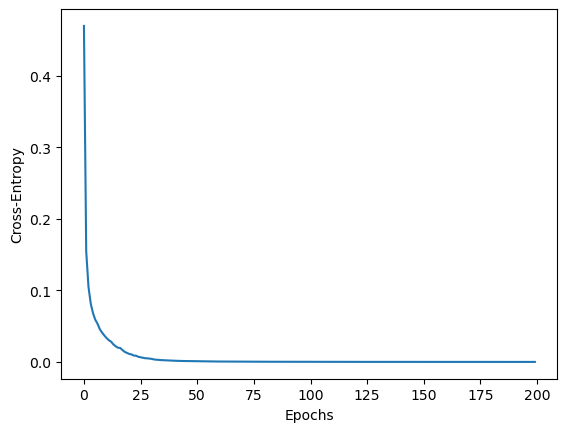

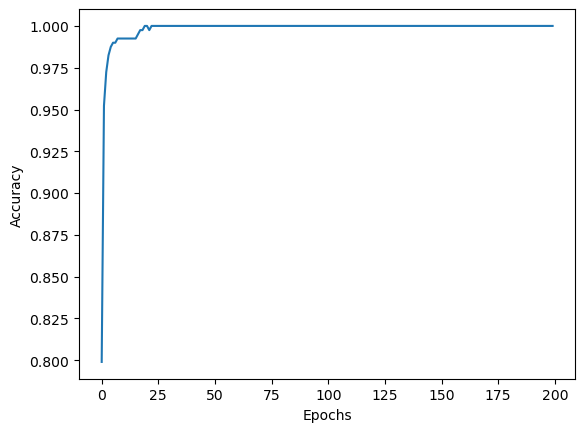

In [19]:
plt.plot(history1['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.show()
plt.plot(history1['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [20]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))

6/6 [==============================] - 0s 962us/step - loss: 0.1032 - accuracy: 0.9825
Loss 0.103218, Accuracy 0.982456


### Sklearn Wrapper
wraps a keras model in a sklearn-like object

In [21]:
from scikeras.wrappers import KerasClassifier

In [22]:
clf = KerasClassifier(build_fn=build_model)

In [23]:
clf.fit(X_train, y_train, epochs=200)

Epoch 1/200


/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


13/13 [==============================] - 0s 1ms/step - loss: 0.3225 - accuracy: 0.9070
Epoch 2/200
13/13 [==============================] - 0s 921us/step - loss: 0.1516 - accuracy: 0.9397
Epoch 3/200
13/13 [==============================] - 0s 980us/step - loss: 0.1066 - accuracy: 0.9523
Epoch 4/200
13/13 [==============================] - 0s 998us/step - loss: 0.0843 - accuracy: 0.9749
Epoch 5/200
13/13 [==============================] - 0s 957us/step - loss: 0.0728 - accuracy: 0.9799
Epoch 6/200
13/13 [==============================] - 0s 949us/step - loss: 0.0622 - accuracy: 0.9799
Epoch 7/200
13/13 [==============================] - 0s 956us/step - loss: 0.0546 - accuracy: 0.9849
Epoch 8/200
13/13 [==============================] - 0s 876us/step - loss: 0.0490 - accuracy: 0.9849
Epoch 9/200
13/13 [==============================] - 0s 960us/step - loss: 0.0451 - accuracy: 0.9899
Epoch 10/200
13/13 [==============================] - 0s 912us/step - loss: 0.0419 - accuracy: 0.9849
Epo

13/13 [==============================] - 0s 922us/step - loss: 1.8580e-04 - accuracy: 1.0000
Epoch 81/200
13/13 [==============================] - 0s 1ms/step - loss: 1.8041e-04 - accuracy: 1.0000
Epoch 82/200
13/13 [==============================] - 0s 936us/step - loss: 1.7258e-04 - accuracy: 1.0000
Epoch 83/200
13/13 [==============================] - 0s 911us/step - loss: 1.6820e-04 - accuracy: 1.0000
Epoch 84/200
13/13 [==============================] - 0s 873us/step - loss: 1.6344e-04 - accuracy: 1.0000
Epoch 85/200
13/13 [==============================] - 0s 885us/step - loss: 1.5763e-04 - accuracy: 1.0000
Epoch 86/200
13/13 [==============================] - 0s 871us/step - loss: 1.5307e-04 - accuracy: 1.0000
Epoch 87/200
13/13 [==============================] - 0s 1ms/step - loss: 1.4594e-04 - accuracy: 1.0000
Epoch 88/200
13/13 [==============================] - 0s 901us/step - loss: 1.4189e-04 - accuracy: 1.0000
Epoch 89/200
13/13 [==============================] - 0s 900us/

13/13 [==============================] - 0s 947us/step - loss: 2.9852e-05 - accuracy: 1.0000
Epoch 158/200
13/13 [==============================] - 0s 931us/step - loss: 2.9495e-05 - accuracy: 1.0000
Epoch 159/200
13/13 [==============================] - 0s 836us/step - loss: 2.8878e-05 - accuracy: 1.0000
Epoch 160/200
13/13 [==============================] - 0s 934us/step - loss: 2.8476e-05 - accuracy: 1.0000
Epoch 161/200
13/13 [==============================] - 0s 922us/step - loss: 2.8022e-05 - accuracy: 1.0000
Epoch 162/200
13/13 [==============================] - 0s 910us/step - loss: 2.7468e-05 - accuracy: 1.0000
Epoch 163/200
13/13 [==============================] - 0s 928us/step - loss: 2.7022e-05 - accuracy: 1.0000
Epoch 164/200
13/13 [==============================] - 0s 849us/step - loss: 2.6579e-05 - accuracy: 1.0000
Epoch 165/200
13/13 [==============================] - 0s 963us/step - loss: 2.6402e-05 - accuracy: 1.0000
Epoch 166/200
13/13 [==============================

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7f7f1e1b5160>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [24]:
clf.model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3968      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 12,354
Trainable params: 12,354
Non-trainable params: 0
_________________________________________________________________


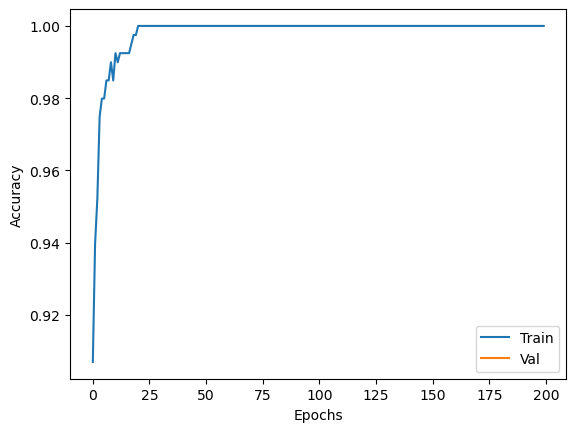

In [25]:
history = clf.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

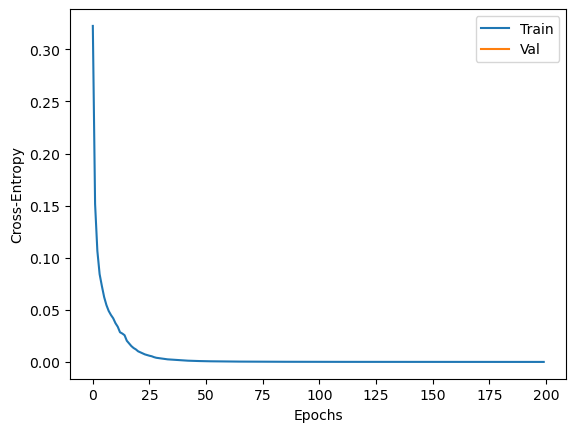

In [26]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [27]:
y_pred = clf.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 892us/step
Accuracy 0.9707602339181286
F1-score [0.96062992 0.97674419]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [28]:
clf = KerasClassifier(build_fn=build_model)

In [29]:
clf.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000


/Users/francesco/miniconda3/envs/dm1_2022/lib/python3.9/site-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


10/10 [==============================] - 0s 10ms/step - loss: 0.5177 - accuracy: 0.7421 - val_loss: 0.3127 - val_accuracy: 0.9125
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9434 - val_loss: 0.2029 - val_accuracy: 0.9250
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9465 - val_loss: 0.1603 - val_accuracy: 0.9375
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9686 - val_loss: 0.1305 - val_accuracy: 0.9500
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9811 - val_loss: 0.1158 - val_accuracy: 0.9500
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9874 - val_loss: 0.1107 - val_accuracy: 0.9500
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9874 - val_loss: 0.1053 - val_accuracy: 0.9375
Epoch 8/1000
10/10

10/10 [==============================] - 0s 2ms/step - loss: 6.5586e-04 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9375
Epoch 59/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.2463e-04 - accuracy: 1.0000 - val_loss: 0.1652 - val_accuracy: 0.9375
Epoch 60/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.2347e-04 - accuracy: 1.0000 - val_loss: 0.1662 - val_accuracy: 0.9375
Epoch 61/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.7038e-04 - accuracy: 1.0000 - val_loss: 0.1672 - val_accuracy: 0.9375
Epoch 62/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.4509e-04 - accuracy: 1.0000 - val_loss: 0.1697 - val_accuracy: 0.9375
Epoch 63/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.1450e-04 - accuracy: 1.0000 - val_loss: 0.1709 - val_accuracy: 0.9375
Epoch 64/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.8998e-04 - accuracy: 1.0000 - val_loss: 0.1720 - val_ac

Epoch 114/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.7873e-05 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9375
Epoch 115/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.5579e-05 - accuracy: 1.0000 - val_loss: 0.2234 - val_accuracy: 0.9500
Epoch 116/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.4509e-05 - accuracy: 1.0000 - val_loss: 0.2245 - val_accuracy: 0.9500
Epoch 117/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.0824e-05 - accuracy: 1.0000 - val_loss: 0.2248 - val_accuracy: 0.9500
Epoch 118/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.9312e-05 - accuracy: 1.0000 - val_loss: 0.2256 - val_accuracy: 0.9375
Epoch 119/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.7203e-05 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9375
Epoch 120/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.6010e-05 - accuracy: 1.0000 - val_

10/10 [==============================] - 0s 3ms/step - loss: 3.4322e-05 - accuracy: 1.0000 - val_loss: 0.2571 - val_accuracy: 0.9375
Epoch 170/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.3794e-05 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.9375
Epoch 171/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.3146e-05 - accuracy: 1.0000 - val_loss: 0.2579 - val_accuracy: 0.9375
Epoch 172/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.2711e-05 - accuracy: 1.0000 - val_loss: 0.2585 - val_accuracy: 0.9375
Epoch 173/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.2283e-05 - accuracy: 1.0000 - val_loss: 0.2591 - val_accuracy: 0.9375
Epoch 174/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.1656e-05 - accuracy: 1.0000 - val_loss: 0.2595 - val_accuracy: 0.9500
Epoch 175/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.1258e-05 - accuracy: 1.0000 - val_loss: 0.2602 - 

10/10 [==============================] - 0s 3ms/step - loss: 1.6256e-05 - accuracy: 1.0000 - val_loss: 0.2813 - val_accuracy: 0.9500
Epoch 225/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.5983e-05 - accuracy: 1.0000 - val_loss: 0.2817 - val_accuracy: 0.9500
Epoch 226/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.5832e-05 - accuracy: 1.0000 - val_loss: 0.2821 - val_accuracy: 0.9500
Epoch 227/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.5621e-05 - accuracy: 1.0000 - val_loss: 0.2825 - val_accuracy: 0.9500
Epoch 228/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.5464e-05 - accuracy: 1.0000 - val_loss: 0.2828 - val_accuracy: 0.9500
Epoch 229/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.5207e-05 - accuracy: 1.0000 - val_loss: 0.2832 - val_accuracy: 0.9500
Epoch 230/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.5035e-05 - accuracy: 1.0000 - val_loss: 0.2836 - 

10/10 [==============================] - 0s 2ms/step - loss: 8.8472e-06 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.9500
Epoch 280/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.7726e-06 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9500
Epoch 281/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.6733e-06 - accuracy: 1.0000 - val_loss: 0.3004 - val_accuracy: 0.9500
Epoch 282/1000
10/10 [==============================] - 0s 2ms/step - loss: 8.5586e-06 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.9500
Epoch 283/1000
10/10 [==============================] - 0s 2ms/step - loss: 8.5046e-06 - accuracy: 1.0000 - val_loss: 0.3011 - val_accuracy: 0.9500
Epoch 284/1000
10/10 [==============================] - 0s 2ms/step - loss: 8.4956e-06 - accuracy: 1.0000 - val_loss: 0.3016 - val_accuracy: 0.9500
Epoch 285/1000
10/10 [==============================] - 0s 3ms/step - loss: 8.3322e-06 - accuracy: 1.0000 - val_loss: 0.3019 - 

10/10 [==============================] - 0s 2ms/step - loss: 5.2646e-06 - accuracy: 1.0000 - val_loss: 0.3160 - val_accuracy: 0.9500
Epoch 335/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.2294e-06 - accuracy: 1.0000 - val_loss: 0.3163 - val_accuracy: 0.9500
Epoch 336/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.1968e-06 - accuracy: 1.0000 - val_loss: 0.3166 - val_accuracy: 0.9500
Epoch 337/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.1364e-06 - accuracy: 1.0000 - val_loss: 0.3169 - val_accuracy: 0.9500
Epoch 338/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.1087e-06 - accuracy: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.9500
Epoch 339/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.0536e-06 - accuracy: 1.0000 - val_loss: 0.3173 - val_accuracy: 0.9500
Epoch 340/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.0142e-06 - accuracy: 1.0000 - val_loss: 0.3176 - 

10/10 [==============================] - 0s 3ms/step - loss: 3.3287e-06 - accuracy: 1.0000 - val_loss: 0.3301 - val_accuracy: 0.9500
Epoch 390/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.3036e-06 - accuracy: 1.0000 - val_loss: 0.3304 - val_accuracy: 0.9500
Epoch 391/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.2916e-06 - accuracy: 1.0000 - val_loss: 0.3306 - val_accuracy: 0.9500
Epoch 392/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.2627e-06 - accuracy: 1.0000 - val_loss: 0.3308 - val_accuracy: 0.9500
Epoch 393/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.2312e-06 - accuracy: 1.0000 - val_loss: 0.3311 - val_accuracy: 0.9500
Epoch 394/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.2020e-06 - accuracy: 1.0000 - val_loss: 0.3314 - val_accuracy: 0.9500
Epoch 395/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.1772e-06 - accuracy: 1.0000 - val_loss: 0.3316 - 

10/10 [==============================] - 0s 3ms/step - loss: 2.1937e-06 - accuracy: 1.0000 - val_loss: 0.3430 - val_accuracy: 0.9500
Epoch 445/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.1757e-06 - accuracy: 1.0000 - val_loss: 0.3433 - val_accuracy: 0.9500
Epoch 446/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.1614e-06 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9500
Epoch 447/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.1389e-06 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9500
Epoch 448/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.1217e-06 - accuracy: 1.0000 - val_loss: 0.3439 - val_accuracy: 0.9500
Epoch 449/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.1131e-06 - accuracy: 1.0000 - val_loss: 0.3441 - val_accuracy: 0.9500
Epoch 450/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.0966e-06 - accuracy: 1.0000 - val_loss: 0.3444 - 

10/10 [==============================] - 0s 2ms/step - loss: 1.4751e-06 - accuracy: 1.0000 - val_loss: 0.3548 - val_accuracy: 0.9500
Epoch 500/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.4657e-06 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9500
Epoch 501/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4575e-06 - accuracy: 1.0000 - val_loss: 0.3552 - val_accuracy: 0.9500
Epoch 502/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4421e-06 - accuracy: 1.0000 - val_loss: 0.3554 - val_accuracy: 0.9500
Epoch 503/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4413e-06 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 0.9500
Epoch 504/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4249e-06 - accuracy: 1.0000 - val_loss: 0.3560 - val_accuracy: 0.9500
Epoch 505/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4226e-06 - accuracy: 1.0000 - val_loss: 0.3561 - 

10/10 [==============================] - 0s 3ms/step - loss: 1.0144e-06 - accuracy: 1.0000 - val_loss: 0.3659 - val_accuracy: 0.9500
Epoch 555/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.0095e-06 - accuracy: 1.0000 - val_loss: 0.3660 - val_accuracy: 0.9500
Epoch 556/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.0043e-06 - accuracy: 1.0000 - val_loss: 0.3664 - val_accuracy: 0.9500
Epoch 557/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.9602e-07 - accuracy: 1.0000 - val_loss: 0.3665 - val_accuracy: 0.9500
Epoch 558/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.8927e-07 - accuracy: 1.0000 - val_loss: 0.3667 - val_accuracy: 0.9500
Epoch 559/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.8027e-07 - accuracy: 1.0000 - val_loss: 0.3669 - val_accuracy: 0.9500
Epoch 560/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.7428e-07 - accuracy: 1.0000 - val_loss: 0.3671 - 

10/10 [==============================] - 0s 3ms/step - loss: 7.0550e-07 - accuracy: 1.0000 - val_loss: 0.3764 - val_accuracy: 0.9500
Epoch 610/1000
10/10 [==============================] - 0s 3ms/step - loss: 7.0138e-07 - accuracy: 1.0000 - val_loss: 0.3767 - val_accuracy: 0.9500
Epoch 611/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.9688e-07 - accuracy: 1.0000 - val_loss: 0.3769 - val_accuracy: 0.9500
Epoch 612/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.9051e-07 - accuracy: 1.0000 - val_loss: 0.3770 - val_accuracy: 0.9500
Epoch 613/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.8863e-07 - accuracy: 1.0000 - val_loss: 0.3773 - val_accuracy: 0.9500
Epoch 614/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.8338e-07 - accuracy: 1.0000 - val_loss: 0.3774 - val_accuracy: 0.9500
Epoch 615/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.7776e-07 - accuracy: 1.0000 - val_loss: 0.3776 - 

10/10 [==============================] - 0s 2ms/step - loss: 4.9745e-07 - accuracy: 1.0000 - val_loss: 0.3865 - val_accuracy: 0.9500
Epoch 665/1000
10/10 [==============================] - 0s 3ms/step - loss: 4.9558e-07 - accuracy: 1.0000 - val_loss: 0.3867 - val_accuracy: 0.9500
Epoch 666/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.9145e-07 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.9500
Epoch 667/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.8845e-07 - accuracy: 1.0000 - val_loss: 0.3871 - val_accuracy: 0.9500
Epoch 668/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.8695e-07 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9500
Epoch 669/1000
10/10 [==============================] - 0s 3ms/step - loss: 4.8246e-07 - accuracy: 1.0000 - val_loss: 0.3873 - val_accuracy: 0.9500
Epoch 670/1000
10/10 [==============================] - 0s 3ms/step - loss: 4.7833e-07 - accuracy: 1.0000 - val_loss: 0.3876 - 

10/10 [==============================] - 0s 2ms/step - loss: 3.5425e-07 - accuracy: 1.0000 - val_loss: 0.3961 - val_accuracy: 0.9500
Epoch 720/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.5088e-07 - accuracy: 1.0000 - val_loss: 0.3962 - val_accuracy: 0.9500
Epoch 721/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.4788e-07 - accuracy: 1.0000 - val_loss: 0.3964 - val_accuracy: 0.9500
Epoch 722/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.4675e-07 - accuracy: 1.0000 - val_loss: 0.3966 - val_accuracy: 0.9500
Epoch 723/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.4713e-07 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.9500
Epoch 724/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.4451e-07 - accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 0.9500
Epoch 725/1000
10/10 [==============================] - 0s 3ms/step - loss: 3.4113e-07 - accuracy: 1.0000 - val_loss: 0.3972 - 

10/10 [==============================] - 0s 3ms/step - loss: 2.5454e-07 - accuracy: 1.0000 - val_loss: 0.4055 - val_accuracy: 0.9500
Epoch 775/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.5266e-07 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9500
Epoch 776/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.5116e-07 - accuracy: 1.0000 - val_loss: 0.4058 - val_accuracy: 0.9500
Epoch 777/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.4891e-07 - accuracy: 1.0000 - val_loss: 0.4059 - val_accuracy: 0.9500
Epoch 778/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.4704e-07 - accuracy: 1.0000 - val_loss: 0.4061 - val_accuracy: 0.9500
Epoch 779/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.4554e-07 - accuracy: 1.0000 - val_loss: 0.4064 - val_accuracy: 0.9500
Epoch 780/1000
10/10 [==============================] - 0s 2ms/step - loss: 2.4442e-07 - accuracy: 1.0000 - val_loss: 0.4065 - 

10/10 [==============================] - 0s 2ms/step - loss: 1.8181e-07 - accuracy: 1.0000 - val_loss: 0.4146 - val_accuracy: 0.9500
Epoch 830/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.8069e-07 - accuracy: 1.0000 - val_loss: 0.4148 - val_accuracy: 0.9500
Epoch 831/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.7919e-07 - accuracy: 1.0000 - val_loss: 0.4149 - val_accuracy: 0.9500
Epoch 832/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.7881e-07 - accuracy: 1.0000 - val_loss: 0.4151 - val_accuracy: 0.9500
Epoch 833/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.7806e-07 - accuracy: 1.0000 - val_loss: 0.4154 - val_accuracy: 0.9500
Epoch 834/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.7656e-07 - accuracy: 1.0000 - val_loss: 0.4155 - val_accuracy: 0.9500
Epoch 835/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.7619e-07 - accuracy: 1.0000 - val_loss: 0.4156 - 

10/10 [==============================] - 0s 2ms/step - loss: 1.3120e-07 - accuracy: 1.0000 - val_loss: 0.4236 - val_accuracy: 0.9500
Epoch 885/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.3046e-07 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.9500
Epoch 886/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2933e-07 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.9500
Epoch 887/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2858e-07 - accuracy: 1.0000 - val_loss: 0.4241 - val_accuracy: 0.9500
Epoch 888/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2821e-07 - accuracy: 1.0000 - val_loss: 0.4242 - val_accuracy: 0.9500
Epoch 889/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2821e-07 - accuracy: 1.0000 - val_loss: 0.4244 - val_accuracy: 0.9500
Epoch 890/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2783e-07 - accuracy: 1.0000 - val_loss: 0.4246 - 

10/10 [==============================] - 0s 3ms/step - loss: 9.7467e-08 - accuracy: 1.0000 - val_loss: 0.4323 - val_accuracy: 0.9500
Epoch 940/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.6342e-08 - accuracy: 1.0000 - val_loss: 0.4323 - val_accuracy: 0.9500
Epoch 941/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.5592e-08 - accuracy: 1.0000 - val_loss: 0.4325 - val_accuracy: 0.9500
Epoch 942/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.5217e-08 - accuracy: 1.0000 - val_loss: 0.4327 - val_accuracy: 0.9500
Epoch 943/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.4842e-08 - accuracy: 1.0000 - val_loss: 0.4329 - val_accuracy: 0.9500
Epoch 944/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.4842e-08 - accuracy: 1.0000 - val_loss: 0.4330 - val_accuracy: 0.9500
Epoch 945/1000
10/10 [==============================] - 0s 2ms/step - loss: 9.2593e-08 - accuracy: 1.0000 - val_loss: 0.4332 - 

10/10 [==============================] - 0s 3ms/step - loss: 6.9726e-08 - accuracy: 1.0000 - val_loss: 0.4407 - val_accuracy: 0.9500
Epoch 995/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.9351e-08 - accuracy: 1.0000 - val_loss: 0.4409 - val_accuracy: 0.9500
Epoch 996/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.9351e-08 - accuracy: 1.0000 - val_loss: 0.4411 - val_accuracy: 0.9500
Epoch 997/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.8601e-08 - accuracy: 1.0000 - val_loss: 0.4412 - val_accuracy: 0.9500
Epoch 998/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.8601e-08 - accuracy: 1.0000 - val_loss: 0.4413 - val_accuracy: 0.9500
Epoch 999/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.8227e-08 - accuracy: 1.0000 - val_loss: 0.4415 - val_accuracy: 0.9500
Epoch 1000/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.7852e-08 - accuracy: 1.0000 - val_loss: 0.4417 -

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x7f7f1e1b5160>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [30]:
y_pred = clf.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 742us/step
Accuracy 0.9766081871345029
F1-score [0.96774194 0.98165138]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



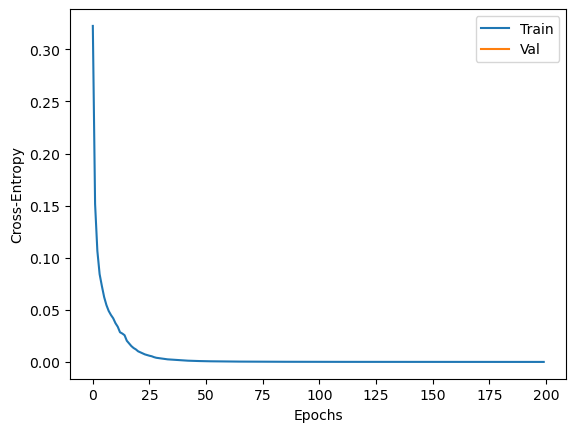

In [31]:
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

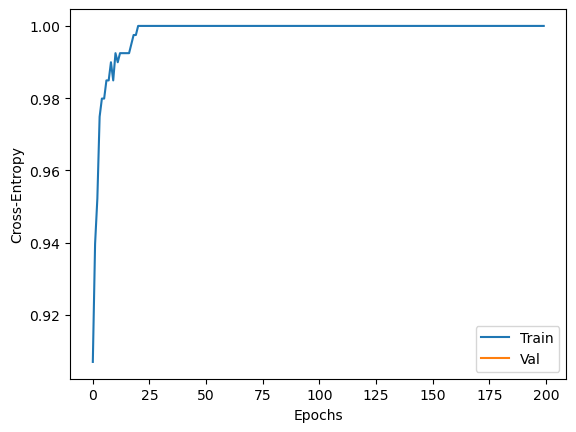

In [32]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

## Early Stopping

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

The most relevant arguments are:

* monitor: quantity to be monitored
* patience: number of epochs with no improvement after which training will be stopped

In [34]:
es = EarlyStopping(monitor='val_accuracy', patience=50, verbose=True)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

clf = KerasClassifier(build_model, callbacks=[es, mc])

In [35]:
clf.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 12ms/step - loss: 0.4436 - accuracy: 0.7956 - val_loss: 0.2920 - val_accuracy: 0.9125
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.9434 - val_loss: 0.2067 - val_accuracy: 0.9125
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1165 - accuracy: 0.9686 - val_loss: 0.1495 - val_accuracy: 0.9375
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.9843 - val_loss: 0.1226 - val_accuracy: 0.9375
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9874 - val_loss: 0.1152 - val_accuracy: 0.9500
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9874 - val_loss: 0.1110 - val_accuracy: 0.9375
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9906 - val_loss: 0.1087 - val_accuracy: 0.9500
Epoch 8/500


KerasClassifier(
	model=<function build_model at 0x7f7f1e1b5160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f7ec821f3d0>, <keras.callbacks.ModelCheckpoint object at 0x7f7ec821f190>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [36]:
y_pred = clf.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 757us/step
Accuracy 0.9824561403508771
F1-score [0.97637795 0.98604651]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



#### L2 Regularization

In [37]:
from keras.regularizers import l2, l1

def build_L2_model():
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', 
                    input_shape=(n_feature,), kernel_regularizer=l2(0.001)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(n_classes))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [38]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

L2_model = KerasClassifier(build_L2_model, callbacks=[es,mc])
L2_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 14ms/step - loss: 1.1951 - accuracy: 0.8553 - val_loss: 0.7386 - val_accuracy: 0.8750
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.8585 - val_loss: 0.7384 - val_accuracy: 0.8625
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.8333 - val_loss: 0.7381 - val_accuracy: 0.8625
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7380 - accuracy: 0.8145 - val_loss: 0.7379 - val_accuracy: 0.8375
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.8113 - val_loss: 0.7376 - val_accuracy: 0.8500
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7374 - accuracy: 0.8113 - val_loss: 0.7372 - val_accuracy: 0.8500
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.7371 - accuracy: 0.8050 - val_loss: 0.7369 - val_accuracy: 0.8250
Epoch 8/500


KerasClassifier(
	model=<function build_L2_model at 0x7f7f1e638670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f7ec821f3d0>, <keras.callbacks.ModelCheckpoint object at 0x7f7ef9e5d2b0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

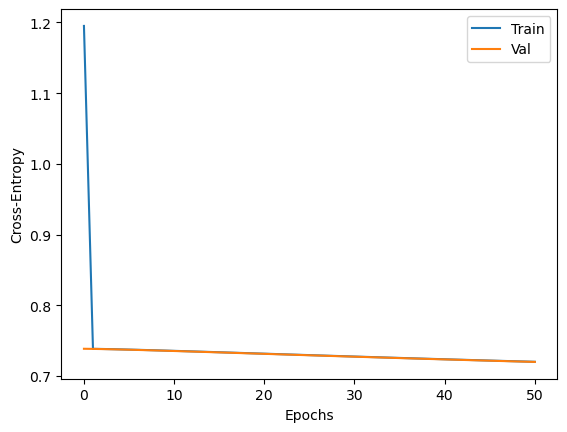

In [39]:
history = L2_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

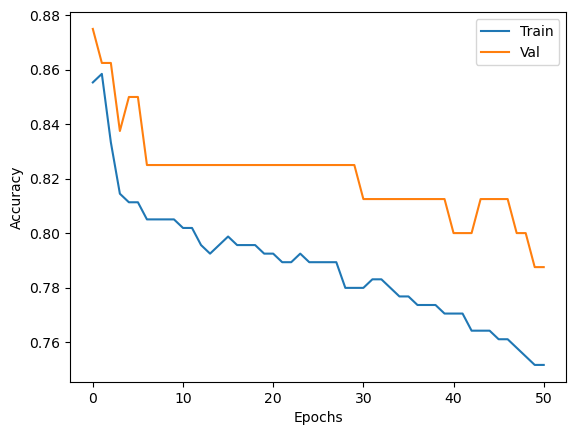

In [40]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Dropout

In [41]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(n_classes))

    #compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [42]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

DROPOUT_model = KerasClassifier(build_DROPOUT_model, callbacks=[es,mc])
DROPOUT_model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 13ms/step - loss: 2.1740 - accuracy: 0.7516 - val_loss: 1.2172 - val_accuracy: 0.8750
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.9465 - val_loss: 0.2895 - val_accuracy: 0.9500
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 0.9591 - val_loss: 0.3453 - val_accuracy: 0.9125
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9717 - val_loss: 0.3437 - val_accuracy: 0.9375
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9780 - val_loss: 0.3700 - val_accuracy: 0.9500
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9811 - val_loss: 0.4870 - val_accuracy: 0.9500
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9843 - val_loss: 0.4020 - val_accuracy: 0.9375
Epoch 8/500


KerasClassifier(
	model=<function build_DROPOUT_model at 0x7f7f1e7781f0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.EarlyStopping object at 0x7f7ec821f3d0>, <keras.callbacks.ModelCheckpoint object at 0x7f7f1e7860a0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

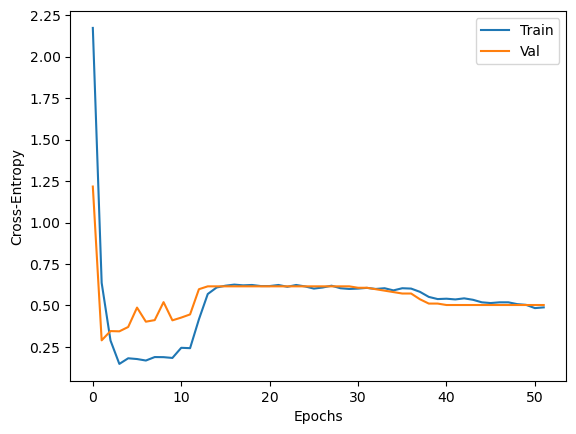

In [43]:
history = DROPOUT_model.history_
plt.plot(history['loss'], label='Train')
plt.plot(history['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

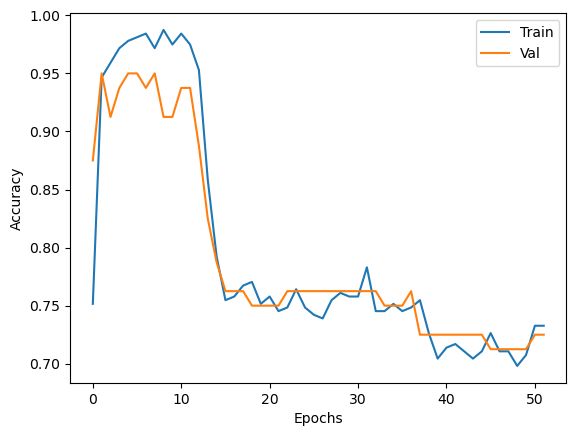

In [44]:
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Model Comparison

In [45]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 911us/step - loss: 0.4947 - accuracy: 0.9357


In [46]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.063418, Accuracy 0.982456
Loss 0.738553, Accuracy 0.883041
Loss 0.494696, Accuracy 0.935673


## Hyper-Parameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [49]:
clf = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [50]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(100, 100, 100), (50, 50, 50), (10, 10, 10), 
                                  (100, 50, 10), (10, 10, 10), (10, 10)],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True, n_iter=15, cv=3)

In [51]:
gs.fit(X_train, y_train)

print(gs.best_score_, gs.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


2023-03-27 18:32:25.544514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 18:32:25.564229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-27 18:32:25.610252: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

0.977405635300372 {'optimizer__learning_rate': 0.01, 'optimizer': 'sgd', 'model__hidden_layer_sizes': (50, 50, 50), 'model__activation': 'tanh', 'epochs': 100}


In [52]:
y_pred = gs.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9766081871345029
F1-score [0.96923077 0.98113208]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.99      0.97      0.98       107

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

